<a href="https://colab.research.google.com/github/ParhamKnt/INSE6310/blob/main/INSE6310FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Applying Preventive Maintenance on Water Pump Failure Data**

In [2]:
## Importing Stuff! ##
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
plt.rcParams['figure.figsize'] = (12,8)
import sklearn
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from scipy.stats import beta
from scipy.stats import f
from itertools import cycle
import scipy.integrate as integrate
from scipy.integrate import quad
import scipy.special as special
# Machine Learning Modules
#from sklearn.naive_bayes import GaussianNB
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.tree import DecisionTreeClassifier
print("Pandas Version: {}".format(pd.__version__))
print("Numpy Version: {}".format(np.__version__))
print("Matplotlib Version: {}".format(matplotlib.__version__))
print("Scikit-learn Version: {}".format(sklearn.__version__))
print("Seaborn Version: {}".format(sns.__version__))

Pandas Version: 1.3.5
Numpy Version: 1.21.6
Matplotlib Version: 3.2.2
Scikit-learn Version: 1.0.2
Seaborn Version: 0.11.2


# Dataset Description:
s

In [ ]:
## Dataset
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('WaterPumpFailureData.csv')
df.head(n=25)
df.info()

Saving WaterPumpFailureData.csv to WaterPumpFailureData.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220320 entries, 0 to 220319
Data columns (total 55 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      220320 non-null  int64  
 1   timestamp       220320 non-null  object 
 2   sensor_00       210112 non-null  float64
 3   sensor_01       219951 non-null  float64
 4   sensor_02       220301 non-null  float64
 5   sensor_03       220301 non-null  float64
 6   sensor_04       220301 non-null  float64
 7   sensor_05       220301 non-null  float64
 8   sensor_06       215522 non-null  float64
 9   sensor_07       214869 non-null  float64
 10  sensor_08       215213 non-null  float64
 11  sensor_09       215725 non-null  float64
 12  sensor_10       220301 non-null  float64
 13  sensor_11       220301 non-null  float64
 14  sensor_12       220301 non-null  float64
 15  sensor_13       220301 non-null  float64
 

In [ ]:
# Let's count the unique values of one of the columns
df['machine_status'].value_counts(dropna=False).head()

NORMAL        205836
RECOVERING     14477
BROKEN             7
Name: machine_status, dtype: int64

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,220320.0,110159.500000,63601.049991,0.000000,55079.750000,110159.500000,165239.250000,220319.000000
sensor_00,210112.0,2.372221,0.412227,0.000000,2.438831,2.456539,2.499826,2.549016
sensor_01,219951.0,47.591611,3.296666,0.000000,46.310760,48.133678,49.479160,56.727430
sensor_02,220301.0,50.867392,3.666820,33.159720,50.390620,51.649300,52.777770,56.032990
sensor_03,220301.0,43.752481,2.418887,31.640620,42.838539,44.227428,45.312500,48.220490
sensor_04,220301.0,590.673936,144.023912,2.798032,626.620400,632.638916,637.615723,800.000000
sensor_05,220301.0,73.396414,17.298247,0.000000,69.976260,75.576790,80.912150,99.999880
sensor_06,215522.0,13.501537,2.163736,0.014468,13.346350,13.642940,14.539930,22.251160
sensor_07,214869.0,15.843152,2.201155,0.000000,15.907120,16.167530,16.427950,23.596640
sensor_08,215213.0,15.200721,2.037390,0.028935,15.183740,15.494790,15.697340,24.348960


In [ ]:
# Entire "sensor_15" column is NaN therefore removing the entire column from the data set
del df['sensor_15']

In [ ]:
# Drop duplicates
df = df.drop_duplicates()
df.shape

(220320, 54)

In [ ]:
df['machine_status'].value_counts(dropna=False).head()

NORMAL        205836
RECOVERING     14477
BROKEN             7
Name: machine_status, dtype: int64

In [ ]:
df['sensor_50'].fillna((df['sensor_50'].mean()), inplace=True)
df['sensor_51'].fillna((df['sensor_51'].mean()), inplace=True)
df['sensor_00'].fillna((df['sensor_00'].mean()), inplace=True)
df['sensor_08'].fillna((df['sensor_08'].mean()), inplace=True)
df['sensor_07'].fillna((df['sensor_07'].mean()), inplace=True)
df['sensor_06'].fillna((df['sensor_06'].mean()), inplace=True)
df['sensor_09'].fillna((df['sensor_09'].mean()), inplace=True)

In [ ]:
df_clean = df.dropna()

In [ ]:
import warnings
warnings.filterwarnings("ignore")
df_clean['date'] = pd.to_datetime(df_clean['timestamp'])
del df_clean['timestamp']

In [ ]:
df_clean = df_clean.set_index('date')
df_clean.head()

,Unnamed: 0,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
date,,,,,,,,,,,,,,,,,,,,,
2018-04-01 00:00:00,0,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2018-04-01 00:01:00,1,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2018-04-01 00:02:00,2,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,15.61777,...,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL
2018-04-01 00:03:00,3,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,15.69734,...,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL
2018-04-01 00:04:00,4,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,15.69734,...,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL


In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 219521 entries, 2018-04-01 00:00:00 to 2018-08-31 23:59:00
Data columns (total 53 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      219521 non-null  int64  
 1   sensor_00       219521 non-null  float64
 2   sensor_01       219521 non-null  float64
 3   sensor_02       219521 non-null  float64
 4   sensor_03       219521 non-null  float64
 5   sensor_04       219521 non-null  float64
 6   sensor_05       219521 non-null  float64
 7   sensor_06       219521 non-null  float64
 8   sensor_07       219521 non-null  float64
 9   sensor_08       219521 non-null  float64
 10  sensor_09       219521 non-null  float64
 11  sensor_10       219521 non-null  float64
 12  sensor_11       219521 non-null  float64
 13  sensor_12       219521 non-null  float64
 14  sensor_13       219521 non-null  float64
 15  sensor_14       219521 non-null  float64
 16  sensor_16       219521

In [ ]:
df_clean.to_csv('WaterPumpCleanData.csv')

**Sensors Value at the times of the Failure:**

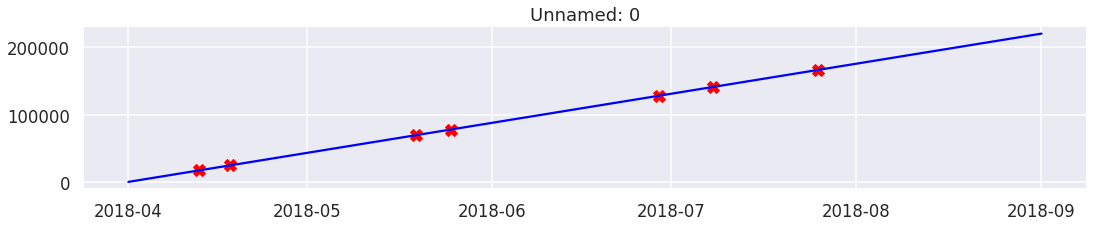

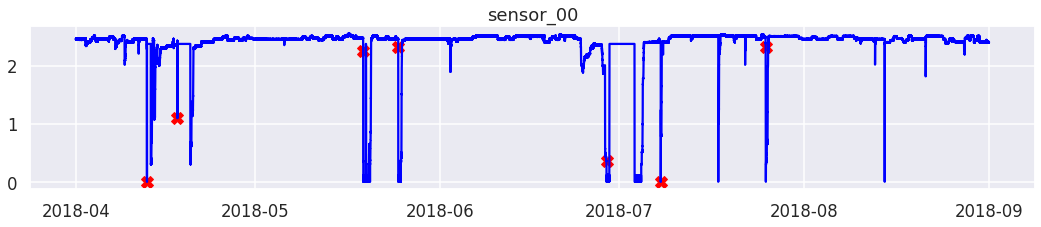

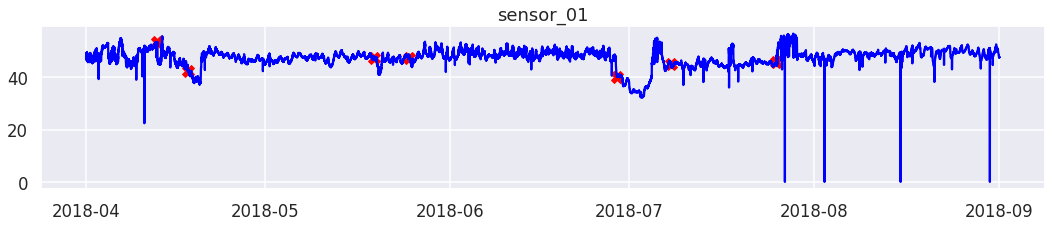

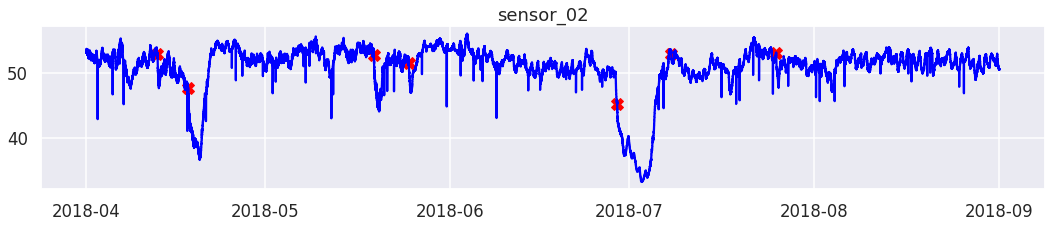

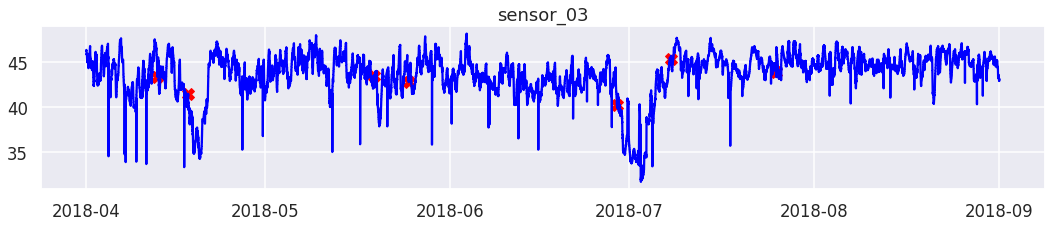

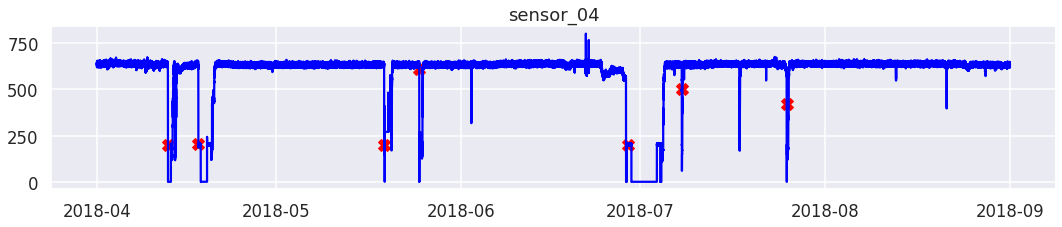

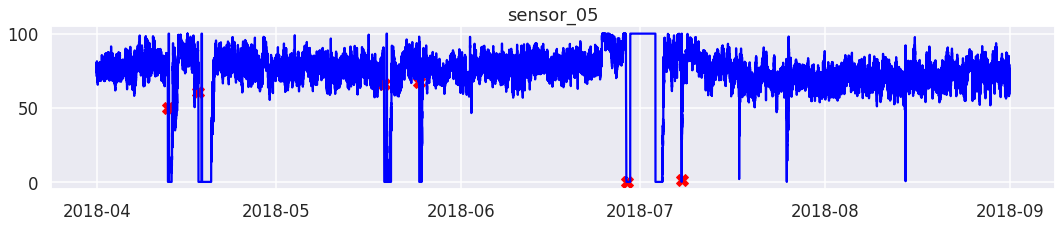

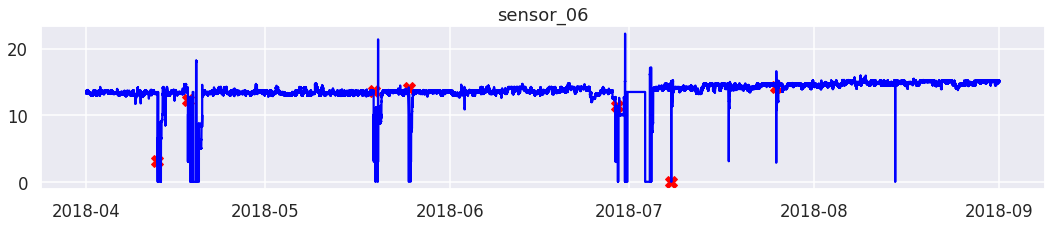

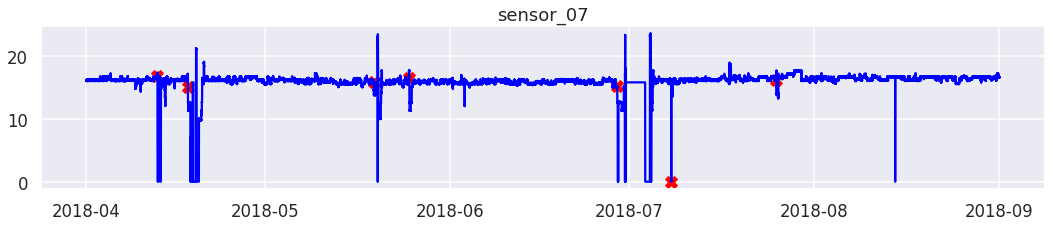

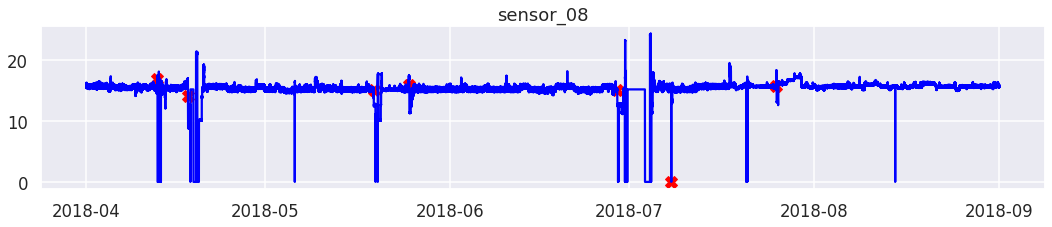

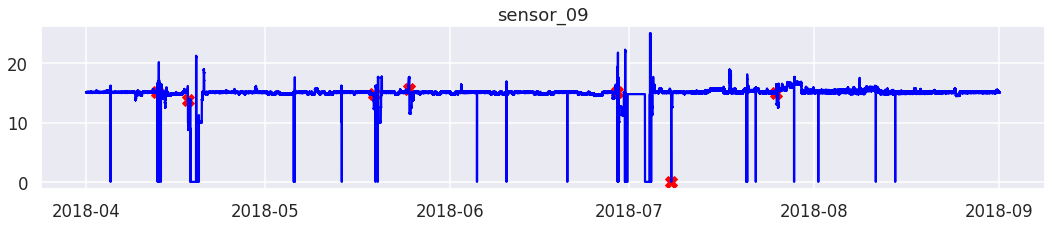

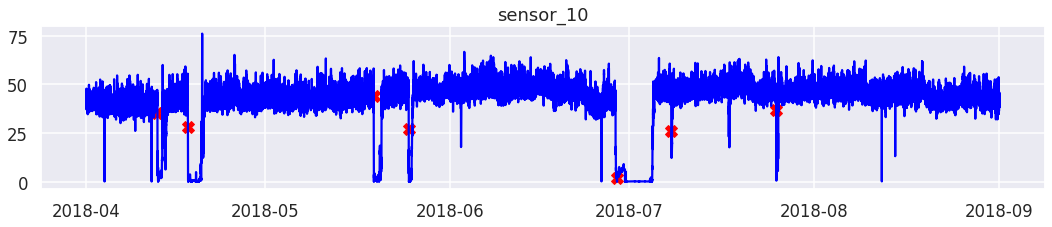

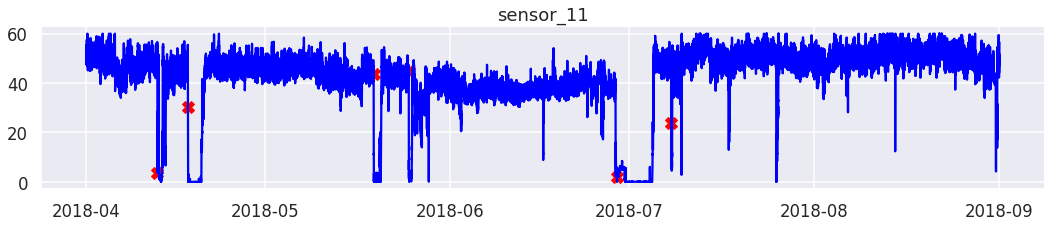

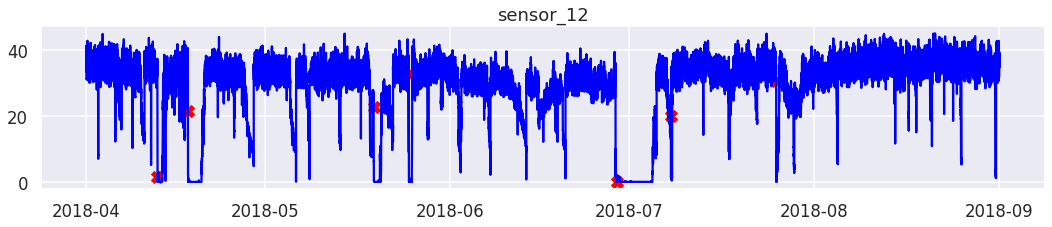

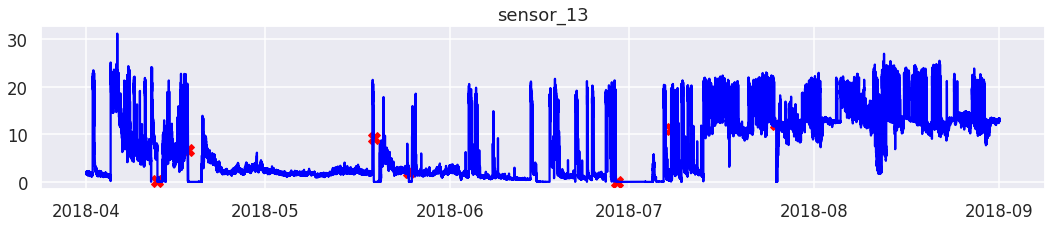

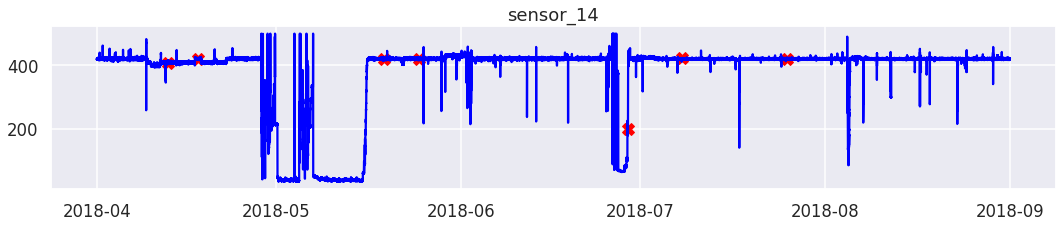

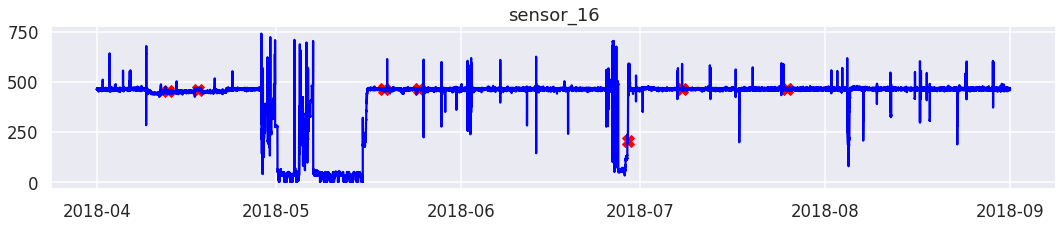

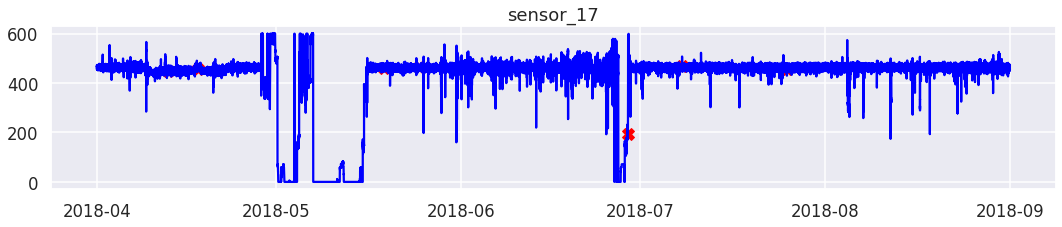

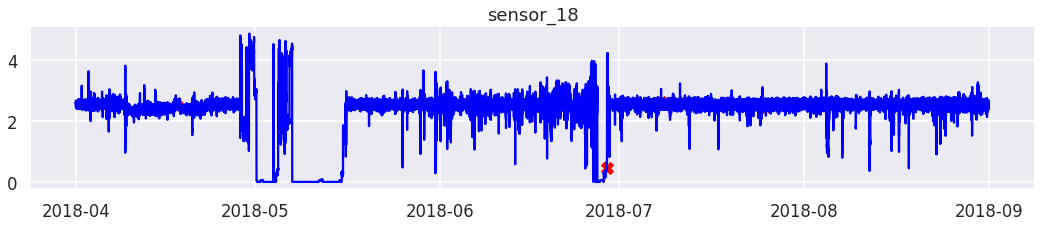

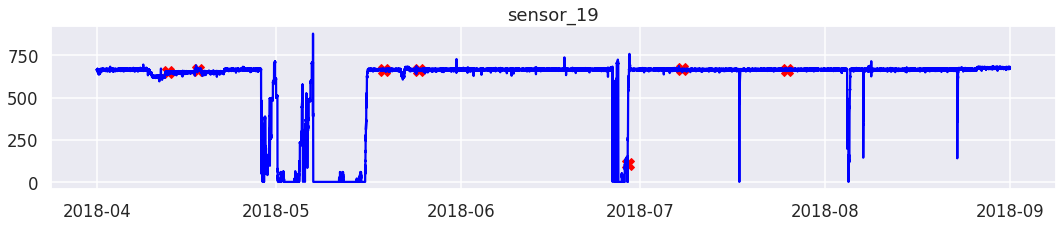

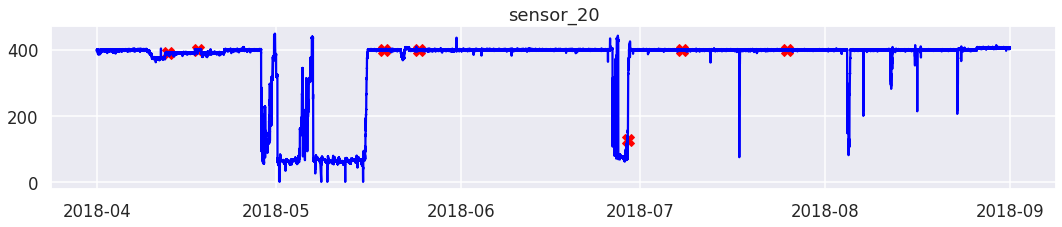

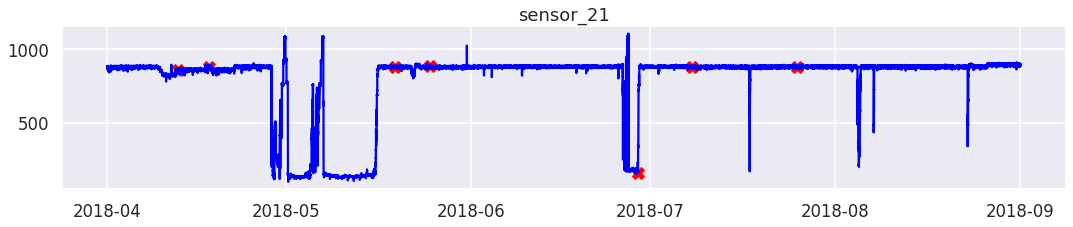

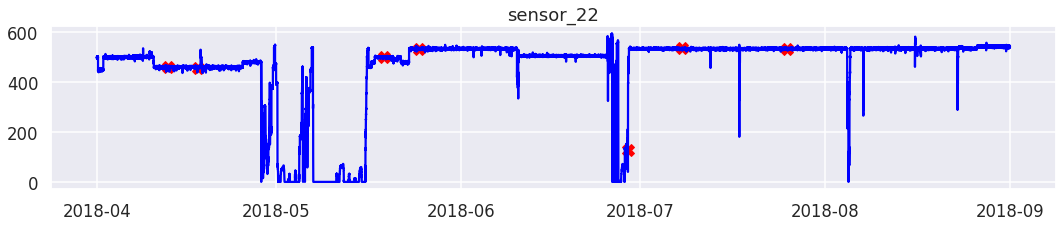

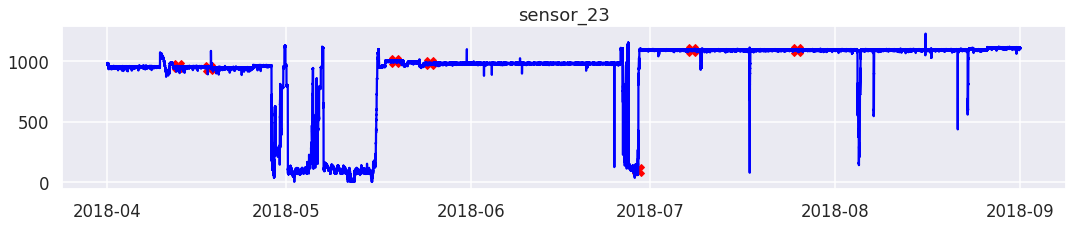

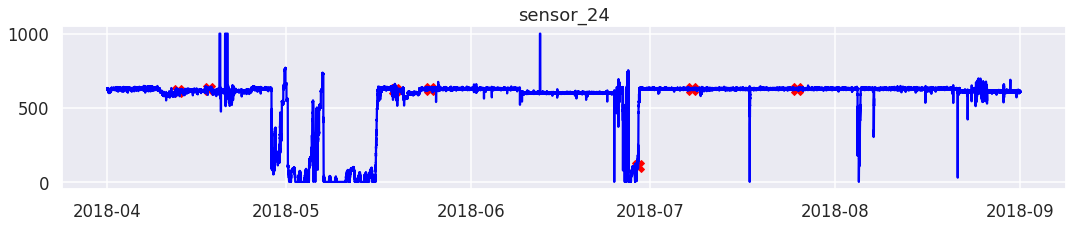

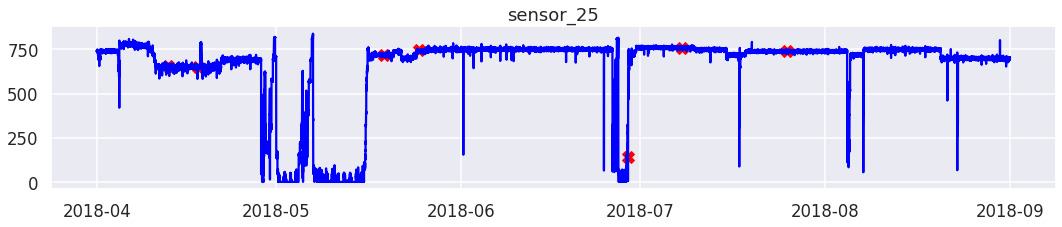

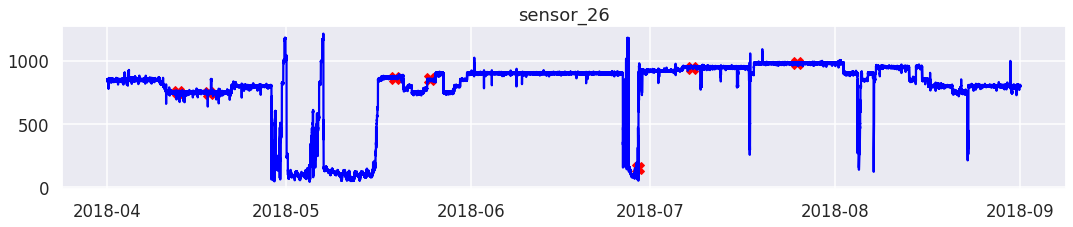

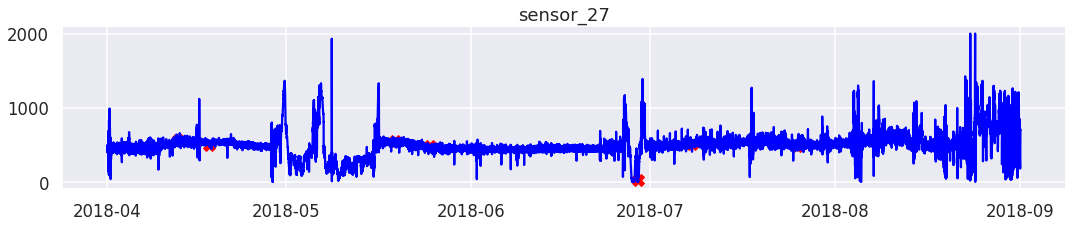

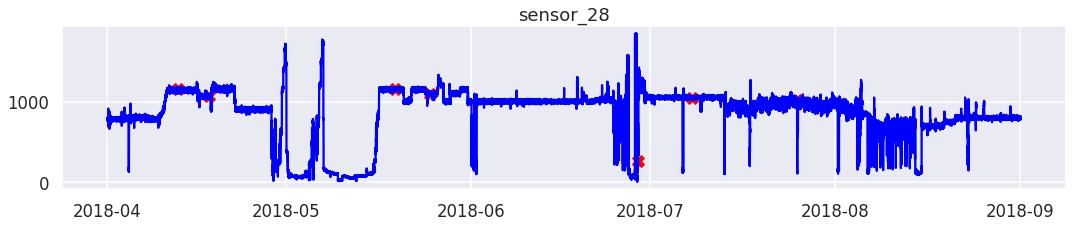

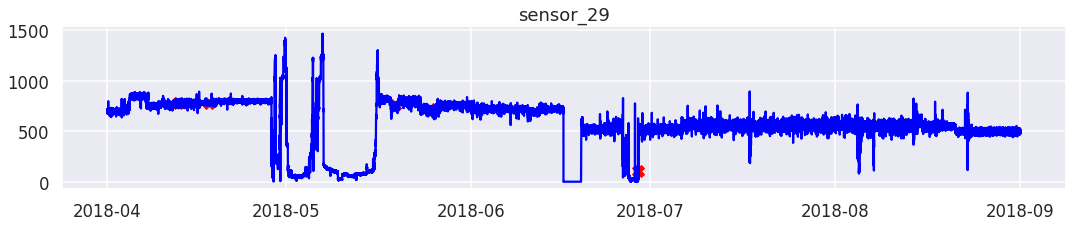

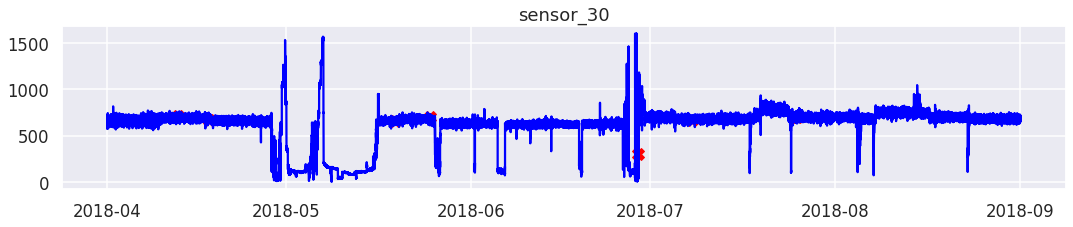

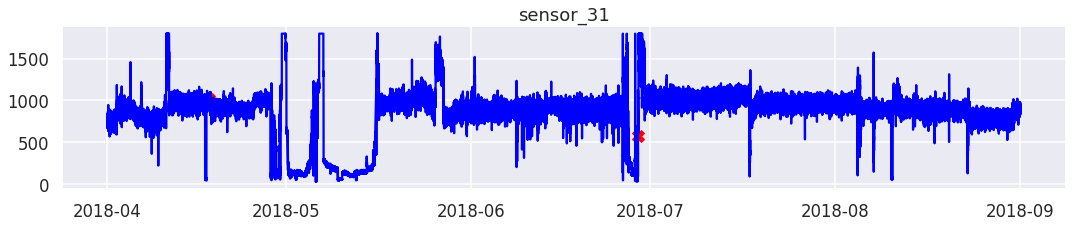

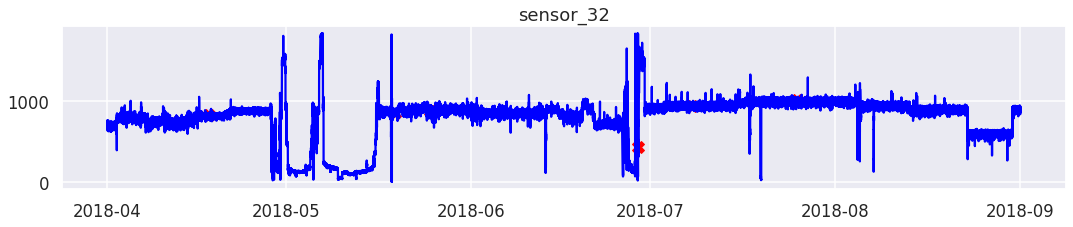

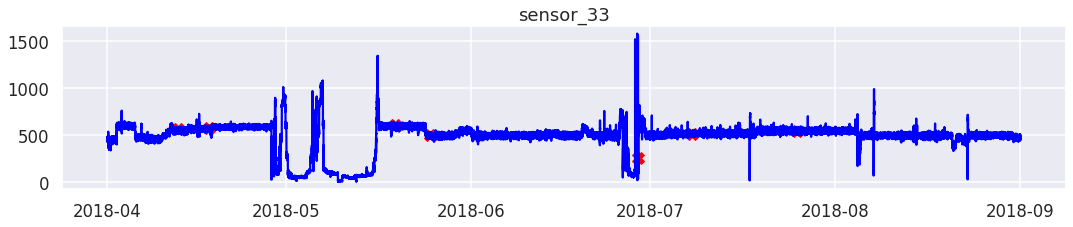

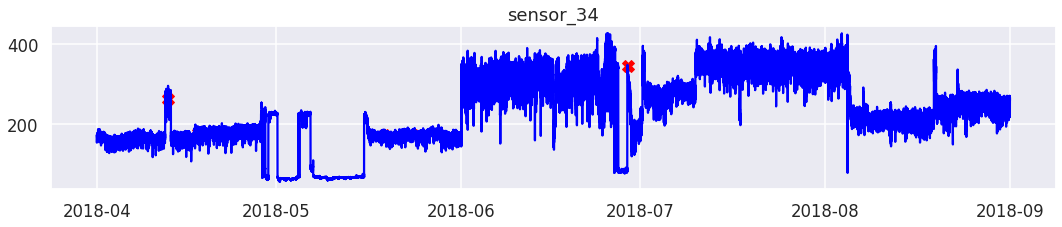

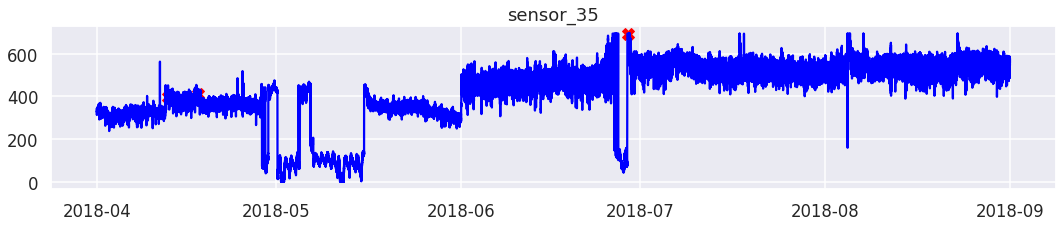

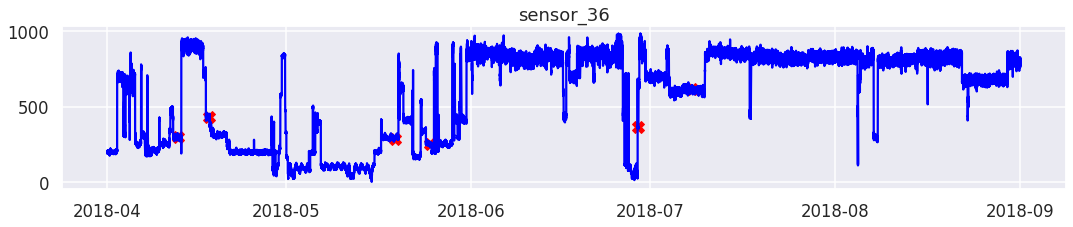

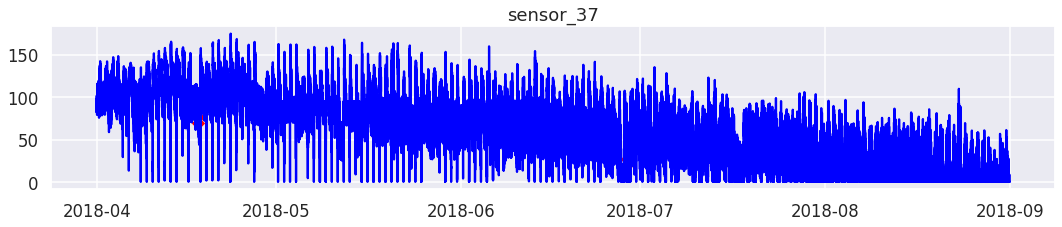

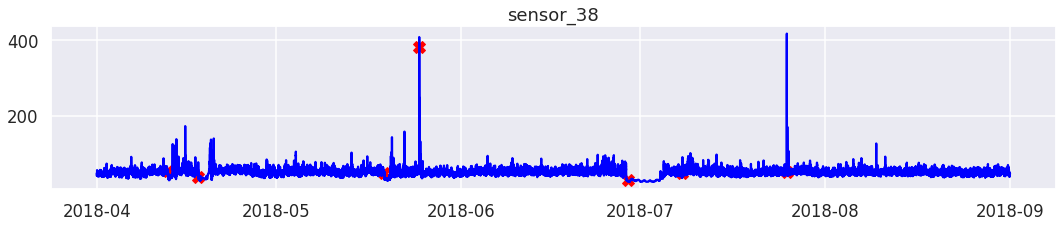

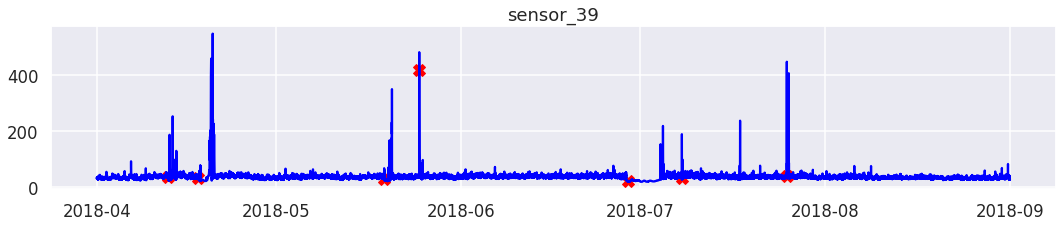

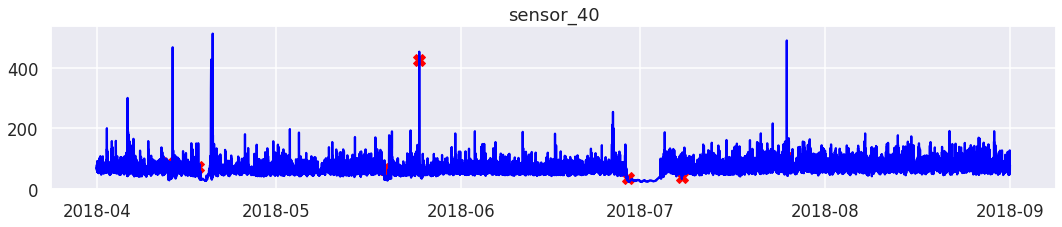

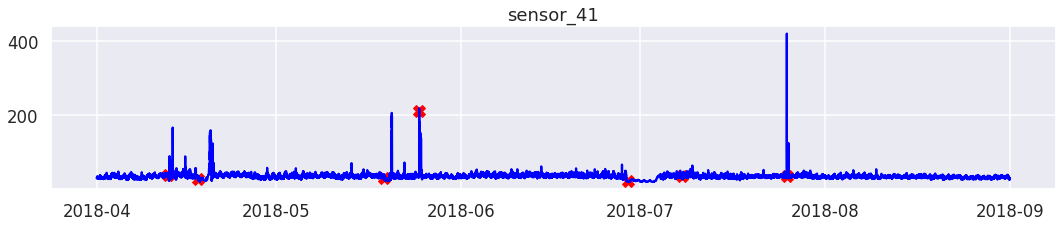

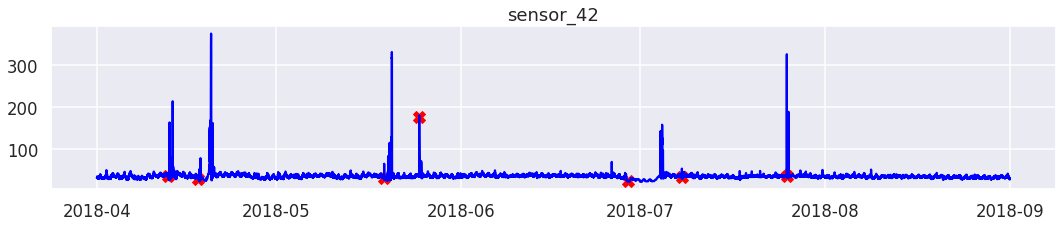

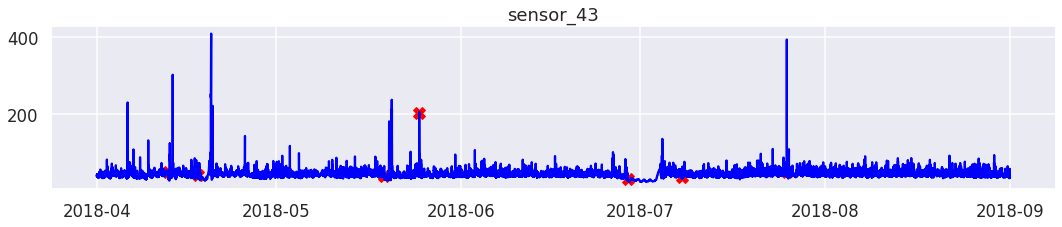

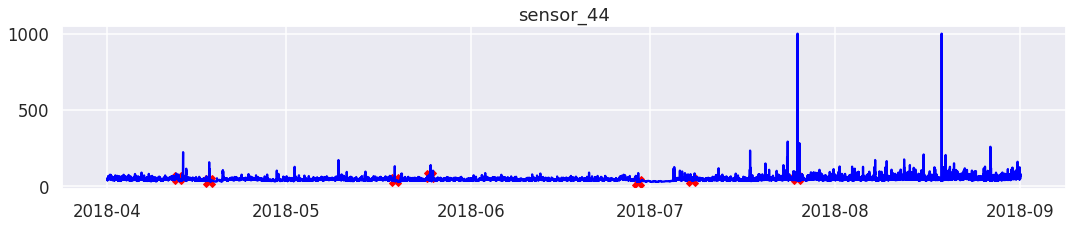

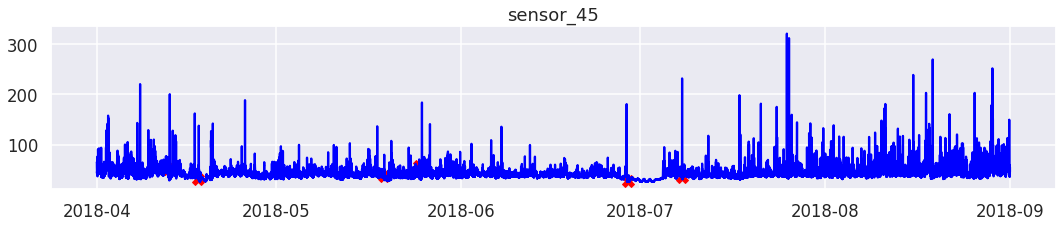

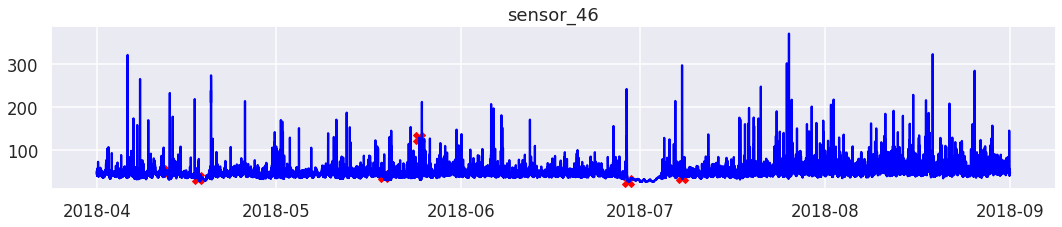

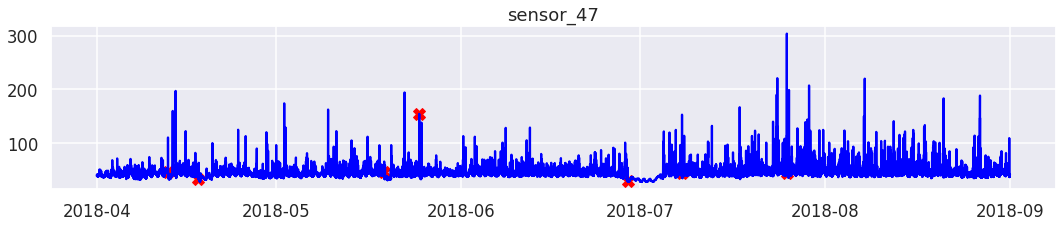

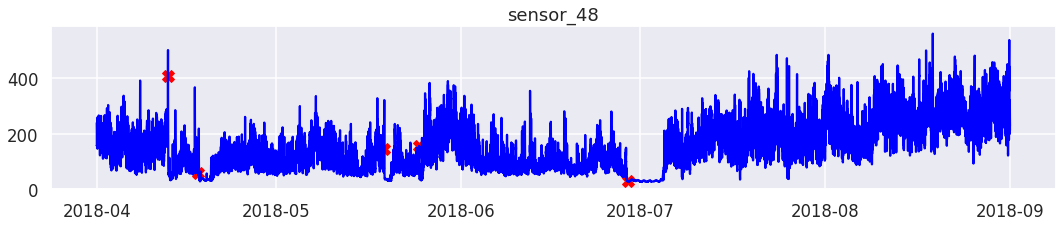

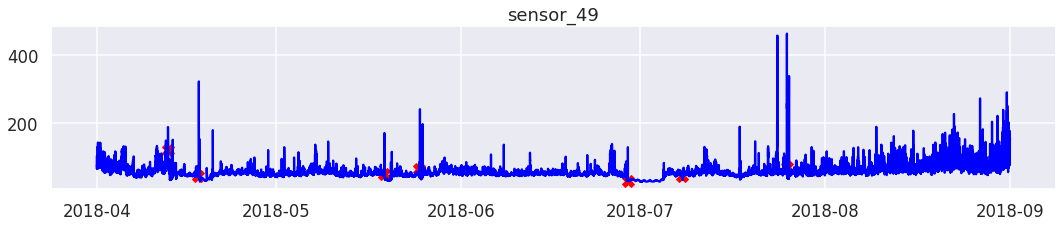

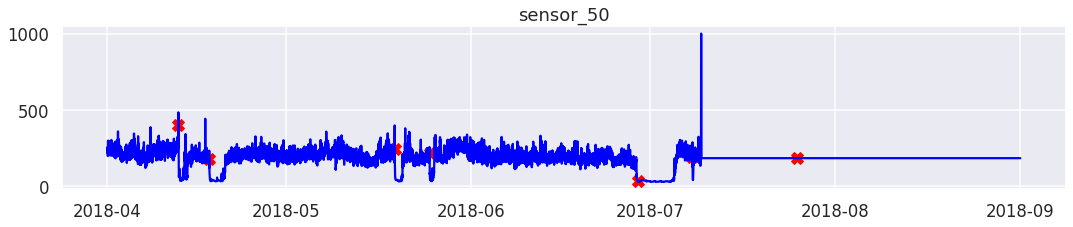

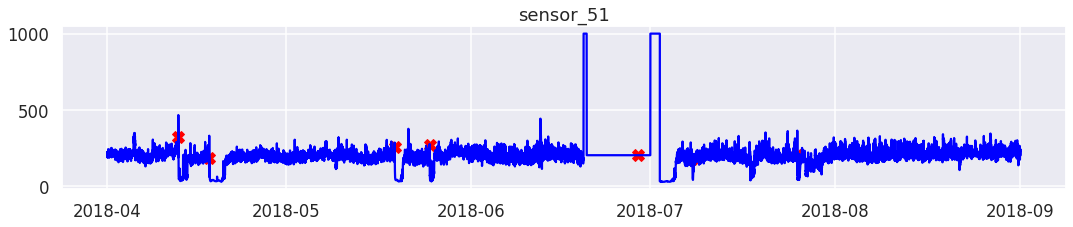

In [ ]:
import warnings
# Extract the readings from BROKEN state and resample by daily average
df=df_clean
broken = df[df['machine_status']=='BROKEN']
# Extract the names of the numerical columns
df2 = df.drop(['machine_status'], axis=1)
names=df2.columns
# Plot time series for each sensor with BROKEN state marked with X in red color
for name in names:
    sns.set_context('talk')
    _ = plt.figure(figsize=(18,3))
    _ = plt.plot(broken[name], linestyle='none', marker='X', color='red', markersize=12)
    _ = plt.plot(df2[name], color='blue')
    _ = plt.title(name)
    plt.show()

In [ ]:
dfnounnamed=df.drop(['Unnamed: 0'],axis=1)
dfnounnamed.describe().T

,count,mean,std,min,25%,50%,75%,max
sensor_00,219521.0,2.371961,0.403223,0.000000,2.417187,2.455556,2.499826,2.549016
sensor_01,219521.0,47.590015,3.299447,0.000000,46.310760,48.133678,49.479160,56.727430
sensor_02,219521.0,50.863387,3.668355,33.159720,50.390620,51.649300,52.777770,56.032990
sensor_03,219521.0,43.746718,2.417856,31.640620,42.838539,44.227428,45.225693,48.220490
sensor_04,219521.0,590.629672,144.127709,2.798032,626.620400,632.754600,637.615723,800.000000
sensor_05,219521.0,73.397642,17.304487,0.000000,69.982320,75.578420,80.918750,99.999880
sensor_06,219521.0,13.500351,2.143252,0.014468,13.346350,13.628470,14.539930,22.251160
sensor_07,219521.0,15.841237,2.176726,0.000000,15.856480,16.167530,16.427950,23.596640
sensor_08,219521.0,15.198273,2.015901,0.028935,15.183740,15.451390,15.697340,24.348960
sensor_09,219521.0,14.796988,2.072470,0.000000,15.010130,15.082470,15.118630,25.000000


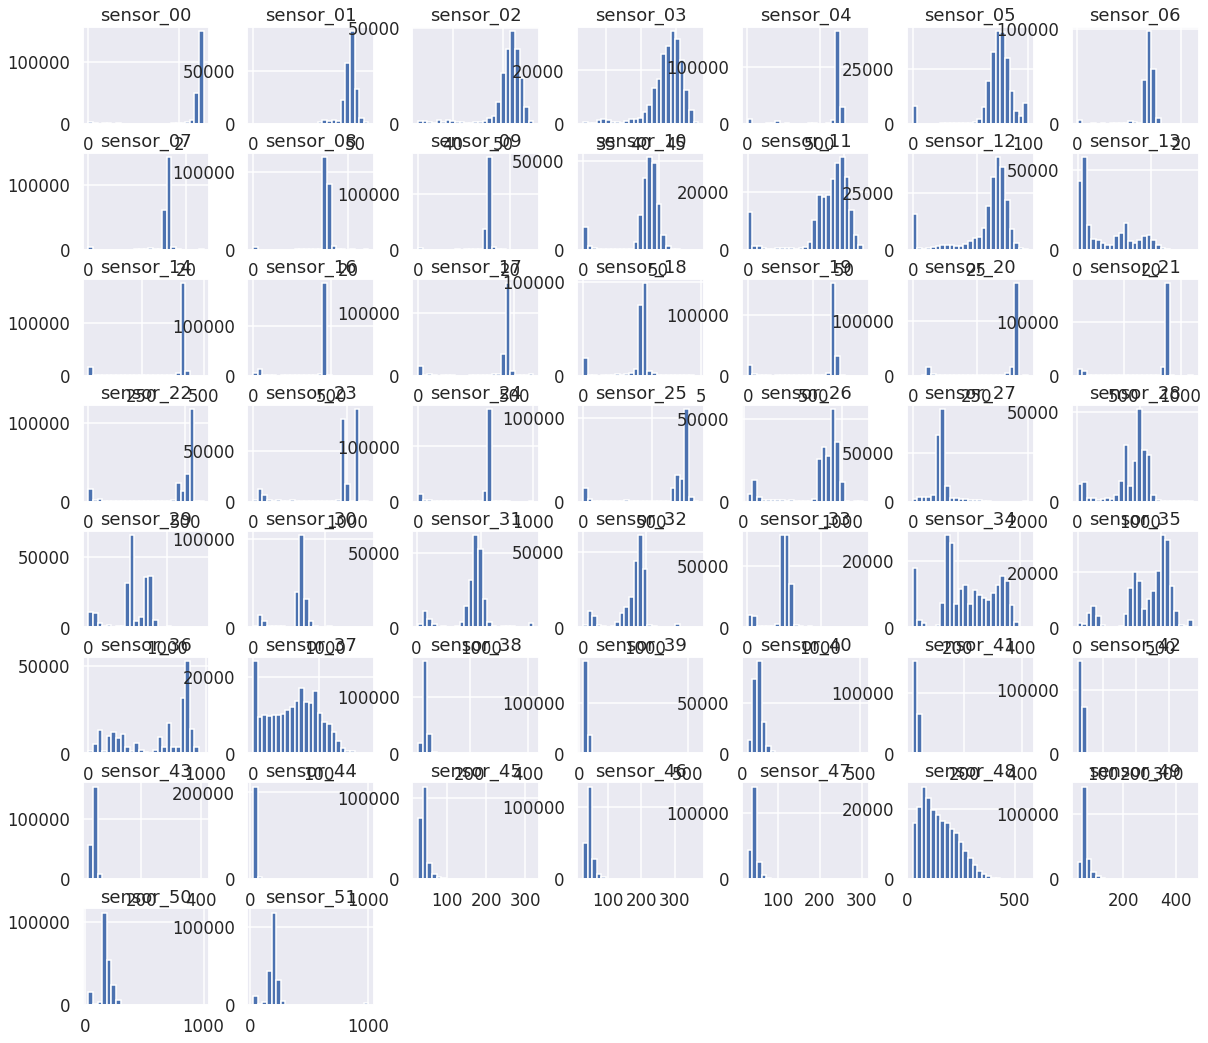

In [ ]:
# Histogram
dfnounnamed.hist(dfnounnamed.columns, bins=25, layout=(8,7), figsize=(20, 18))
plt.show()

In [ ]:
NormalData = df[ df["machine_status"] == "NORMAL" ]
NormalData.shape
NormalDataRows = NormalData.shape[0]
RowsTotal= df.shape[0]
percent_machine_status_NORMAL = (NormalDataRows / RowsTotal) * 100.0
print(percent_machine_status_NORMAL)

93.41566410502867


In [ ]:
FailureData = df[ df["machine_status"] == "BROKEN" ]
FailureDataRows = FailureData.shape[0]

In [ ]:
RecoveringData = df[ df["machine_status"] == "RECOVERING" ]
RecoveringDataRows = RecoveringData.shape[0]
percent_machine_status_RECOVERING = (RecoveringDataRows / RowsTotal) * 100.0
print(percent_machine_status_RECOVERING)

6.581147133987181


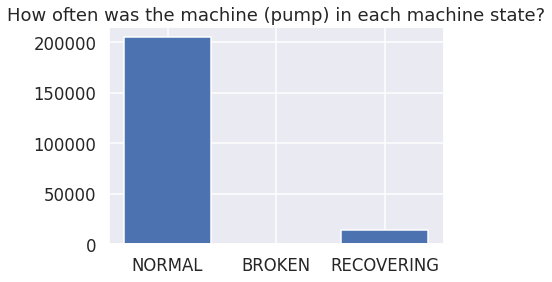

In [ ]:
xpos = [1,2,3]
data = [NormalDataRows,
        FailureDataRows,
        RecoveringDataRows]
possible_machine_states = list(df.machine_status.unique())
fig, ax = plt.subplots()
ax.bar(xpos,data)
ax.set_xticks(xpos)
ax.set_xticklabels(possible_machine_states)
ax.set_title("How often was the machine (pump) in each machine state?")
plt.show()

In [ ]:
FailureRowNumbers = list(FailureData["Unnamed: 0"].values)
recovering_times_hours = []
for i in FailureRowNumbers:
    print("\nMachine in status BROKEN in row: {0}".format(i) )
    go_further = True
    j = i
    while go_further:
        j += 1
        machine_status_in_row_j = df.iloc[j]["machine_status"]        
        if machine_status_in_row_j != "RECOVERING":
            go_further = False      
    print("Machine went back to status {0} after {1} minutes."
          .format(machine_status_in_row_j, j-i)
          )
    recovering_hours = (j-i)/60
    recovering_days  = recovering_hours / 24
    print("Machine was in RECOVERING state for {0:.4f} hours / {1:.1f} days"
          .format( recovering_hours, recovering_days )
         )
    recovering_times_hours.append(recovering_hours)


Machine in status BROKEN in row: 17155
Machine went back to status NORMAL after 915 minutes.
Machine was in RECOVERING state for 15.2500 hours / 0.6 days

Machine in status BROKEN in row: 24510
Machine went back to status NORMAL after 3055 minutes.
Machine was in RECOVERING state for 50.9167 hours / 2.1 days

Machine in status BROKEN in row: 69318
Machine went back to status NORMAL after 950 minutes.
Machine was in RECOVERING state for 15.8333 hours / 0.7 days

Machine in status BROKEN in row: 77790
Machine went back to status NORMAL after 243 minutes.
Machine was in RECOVERING state for 4.0500 hours / 0.2 days

Machine in status BROKEN in row: 128040
Machine went back to status NORMAL after 7895 minutes.
Machine was in RECOVERING state for 131.5833 hours / 5.5 days

Machine in status BROKEN in row: 141131
Machine went back to status NORMAL after 1 minutes.
Machine was in RECOVERING state for 0.0167 hours / 0.0 days

Machine in status BROKEN in row: 166440
Machine went back to status 

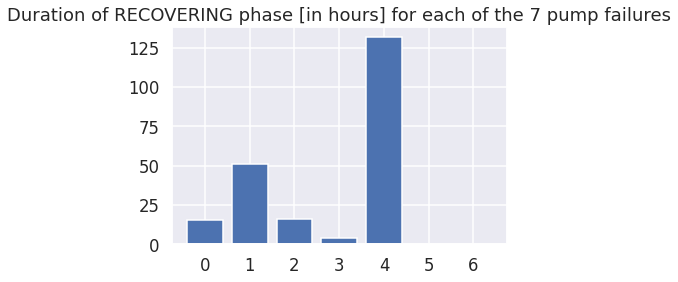

In [ ]:
xpos = np.arange( len(recovering_times_hours) )
fig, ax = plt.subplots()
ax.bar(xpos,recovering_times_hours)
ax.set_xticks(xpos)
ax.set_xticklabels(xpos)
ax.set_title("Duration of RECOVERING phase [in hours] for each of the 7 pump failures")
plt.show()

In [ ]:
recovering_times_hours

[15.25,
 50.916666666666664,
 15.833333333333334,
 4.05,
 131.58333333333334,
 0.016666666666666666,
 0.016666666666666666]

# **Weibull Distribution**
Finding the parameters of the Weibull distribution for failure data

In [ ]:
FailureData = df.loc[df['machine_status'] == 'BROKEN']
FailureData

,Unnamed: 0,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
date,,,,,,,,,,,,,,,,,,,,,
2018-04-12 21:55:00,17155,0.000000,53.342010,52.821180,43.402775,202.526031,49.79289,3.219039,16.890910,16.869210,...,50.78125,50.92593,51.215280,50.636570,46.006940,409.143500,121.527800,401.909700,324.652800,BROKEN
2018-04-18 00:30:00,24510,1.093982,42.534720,47.699650,41.449650,206.038757,60.30106,12.304690,15.154800,14.185470,...,42.70833,34.72222,31.539350,34.432870,33.275460,59.895830,44.560180,177.662000,183.738400,BROKEN
2018-05-19 03:18:00,69318,2.258796,47.265630,52.734370,43.446178,200.115738,66.14643,13.592300,15.914350,15.147570,...,39.06250,35.01157,37.905090,39.062500,45.428240,144.675900,49.768520,246.238400,257.523100,BROKEN
2018-05-25 00:30:00,77790,2.321759,47.482640,51.475693,42.795135,612.152800,67.30158,14.062500,16.608800,15.943290,...,202.34370,65.68287,57.870370,127.893500,153.935200,155.381900,65.682870,220.196800,267.361100,BROKEN
2018-06-28 22:00:00,128040,0.364005,40.190970,45.225690,40.190971,201.368622,0.00000,11.335360,15.270540,15.183740,...,32.29166,28.06713,28.067129,29.513889,29.224537,29.224537,29.513889,32.407406,202.699667,BROKEN
2018-07-08 00:11:00,141131,0.001968,45.138890,52.907990,45.355900,500.000000,1.40131,0.028935,0.036169,0.036169,...,36.19791,37.32639,35.300930,38.194440,43.402780,99.537030,44.849540,192.129600,174.768500,BROKEN
2018-07-25 14:00:00,166440,2.318808,45.833332,52.994790,43.880210,420.503448,72.52040,14.185470,16.247110,15.697340,...,51.30208,52.10200,52.662040,67.129630,43.981480,230.324100,69.733800,183.049260,205.729200,BROKEN


In [ ]:
FailureData.to_csv('FailurezData.csv')

In [3]:
Fi = np.array([[9.428],[22.849],[36.412],[50],[63.588],[77.151],[90.572]])
TimeDay = np.array([[17155/1440],[24510/1440],[69318/1440],[77790/1440],[128040/1440],[141131/1440],[166440/1440]])
print("Failure Times (Day)=",TimeDay) 
print("Fi=",Fi)

Failure Times (Day)= [[ 11.91319444]
 [ 17.02083333]
 [ 48.1375    ]
 [ 54.02083333]
 [ 88.91666667]
 [ 98.00763889]
 [115.58333333]]
Fi= [[ 9.428]
 [22.849]
 [36.412]
 [50.   ]
 [63.588]
 [77.151]
 [90.572]]


**Linear Regression:**

In [4]:
from sklearn.linear_model import LinearRegression
Fi.reshape((1, -1));
FiLog=np.log(np.log(1/(1-0.01*Fi)))
TimeDayLog=np.log(TimeDay)
model = LinearRegression().fit(TimeDayLog, FiLog)
A_hat=model.intercept_;
B_hat=model.coef_;
print(f"A_hat: {model.intercept_}")
print(f"B_hat: {model.coef_}")

A_hat: [-5.08344335]
B_hat: [[1.18609324]]


In [ ]:
np.log(np.log(1/(1-0.01*Fi)))

array([[-2.31238221],
       [-1.34936224],
       [-0.79242531],
       [-0.36651292],
       [ 0.0102194 ],
       [ 0.38951378],
       [ 0.85929117]])

**Finding Beta (Shape Paremeter) and Eta (Scale Parameter) of Weibull Distribution:**

In [5]:
import math
Beta = B_hat;
print("Beta=",Beta)
Eta = math.exp(-A_hat/B_hat)
print("Eta=",Eta)

Beta= [[1.18609324]]
Eta= 72.66585511711865


**Weibull Failure Density Function:**

In [6]:
Cf=100000;
Cp=600;

In [7]:
def f(t):
  Eta=72.66585511711865;
  Beta=1.18609324
  return (Beta/(Eta**Beta))*(t**(Beta-1))*(math.exp(-(t/Eta))**Beta)  
def F(t):
  Eta=72.66585511711865;
  Beta=1.18609324
  return 1-(math.exp(-t/Eta)**Beta)
def R(t):
  Eta=72.66585511711865;
  Beta=1.18609324
  return math.exp(-t/Eta)**Beta
def h(t):
  Eta=72.66585511711865;
  Beta=1.18609324
  return (Beta/(Eta**Beta))*t**(Beta-1)
def M(t):
  return t*f(t)

# **K-S Test:**

for the Weilbull distribution:

In [ ]:
for i in TimeDay:
  HypF=F(i)
  print(HypF)

0.17671587457884752
0.24256964093872924
0.5442120213339735
0.5859458991153619
0.7657457440027154
0.798050211953734
0.84841619290798


In [ ]:
HypF=np.array([[0.17671587457884752],[0.24256964093872924],[0.5442120213339735],[0.5859458991153619],[0.7657457440027154],[0.798050211953734],[0.84841619290798]])

In [ ]:
for j in range(7):
  d=abs(HypF[j]-0.01*Fi[j])
  print(d)
print('maximum value of d=',0.12986574)

[0.08243587]
[0.01407964]
[0.18009202]
[0.0859459]
[0.12986574]
[0.02654021]
[0.05730381]
maximum value of d= 0.12986574


In [ ]:
for j in range(7):
  d=abs(HypF[j]-0.01*Fi[j-1])
  print(d)
maxd=0.31572202
print('maximum value of d=',maxd)

[0.72900413]
[0.14828964]
[0.31572202]
[0.2218259]
[0.26574574]
[0.16217021]
[0.07690619]
maximum value of d= 0.31572202


In [ ]:
dalpha=0.436
d=maxd;
print('The d-alpha, for 7 samples, with 10% significance level is=',dalpha)
if d < dalpha:
  print('The proposed Weibull distribution fits the data.')
else:
  print('The proposed Weibull distribution DOES NOT fit the data')

The d-alpha, for 7 samples, with 10% significance level is= 0.436
The proposed Weibull distribution fits the data.




---



# What if we chose Normal Distribution:

In [ ]:
from scipy.stats import norm
mu, std = norm.fit(TimeDay)
print('mu is=',mu)
print('std is=',std)

mu is= 61.94285714285714
std is= 37.186513086059215


In [ ]:
HypFnorm=norm.cdf(TimeDay, mu, std)

In [ ]:
HypFnorm=np.array([[0.0892527 ],[0.11351993],[0.35522703],[0.41564988],[0.76588605],[0.83393563],[0.92541526]])

**K-S Test for Normal Distribution:**

In [ ]:
for j in range(7):
  d2=abs(HypFnorm[j]-0.01*Fi[j-1])
  print(d2)
maxd2=0.26588605
print('maximum value of d=',0.26588605)

[0.8164673]
[0.01923993]
[0.12673703]
[0.05152988]
[0.26588605]
[0.19805563]
[0.15390526]
maximum value of d= 0.26588605


In [ ]:
dalpha=0.436
d2=maxd2;
print('The d-alpha, for 7 samples, with 10% significance level is=',dalpha)
if d2 < dalpha:
  print('The proposed Normal distribution fits the data.')
else:
  print('The proposed Normal distribution DOES NOT fit the data')

The d-alpha, for 7 samples, with 10% significance level is= 0.436
The proposed Normal distribution fits the data.




---


Since both Weibull and Normal distribution fit the data, we will continue with the estimated Weibull distribution:

# Optimization:

In [8]:
import sympy as sp 
from scipy import *
import scipy.integrate
t = sp.Symbol('t') 
Eta=72.66585511711865;
Beta=1.18609324
Mt=t*((Beta/(Eta**Beta))*(t**(Beta-1))*(sp.exp(-(t/Eta))**Beta));
intM = sp.integrate(Mt, (t, 0, t))
print(intM)
intMfunc = sp.lambdify(t, intM)
print(intMfunc)

0.00735203285832884*Integral(t**1.18609324*exp(-0.0137616215812538*t)**1.18609324, (t, 0, t))
<function _lambdifygenerated at 0x7f17be2ee3b0>


In [9]:
def C(t):
   # if t == 0:   # dodge a division-by-zero bullet
     #   return np.inf
    return (Cp * R(t) + Cf * (1 - R(t))) / (t * R(t) + intMfunc(t))
from scipy.optimize import minimize_scalar
res = minimize_scalar(C,bounds=(0, 60), method='bounded')
print(res)

     fun: 1732.8719909157508
 message: 'Solution found.'
    nfev: 13
  status: 0
 success: True
       x: 15.778847817831734


In [28]:
out=(res.x,res.fun)

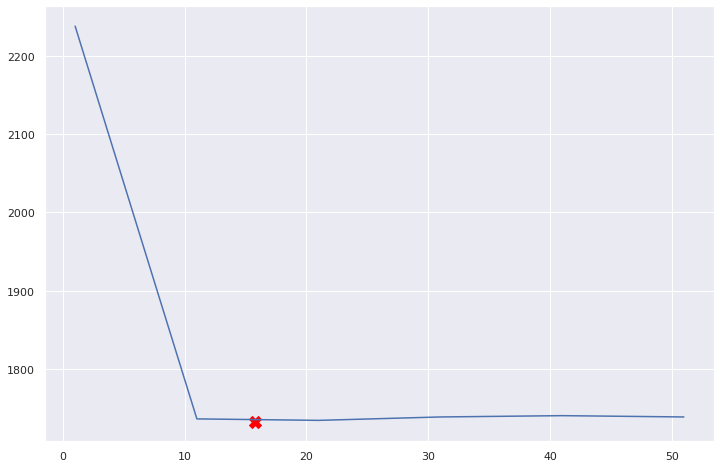

In [34]:
t = np.arange(1, 60,10)
C2 = np.vectorize(C)
plt.plot(out[0],out[1],linestyle='none', marker='X', color='red', markersize=12)
plt.plot(t,C2(t))
plt.show()